In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import utils.globalsettings as gs

In [3]:
df = pd.read_csv(gs.the_files.ROBYN_DATA, parse_dates=["DATE"], index_col = "DATE")

In [4]:
df.head()

,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
DATE,,,,,,,,,,,
2015-11-23,2.754372e+06,67075.04,0.0,38185.466667,7.290385e+07,0.000000,0,8125009,22821.398744,na,19401.653846
2015-11-30,2.584277e+06,85840.36,0.0,0.000000,1.658110e+07,29511.715457,12400,7901549,3425.857351,na,14791.000000
2015-12-07,2.547387e+06,0.00,396835.2,1361.600000,4.995477e+07,36132.358958,11360,8300197,12769.126133,na,14544.000000
2015-12-14,2.875220e+06,250350.92,0.0,53040.000000,3.164930e+07,36804.210958,12760,8122883,8401.472031,na,2800.000000
2015-12-21,2.215953e+06,0.00,832008.0,0.000000,8.802269e+06,28401.744069,10840,7105985,2068.747816,na,15478.000000


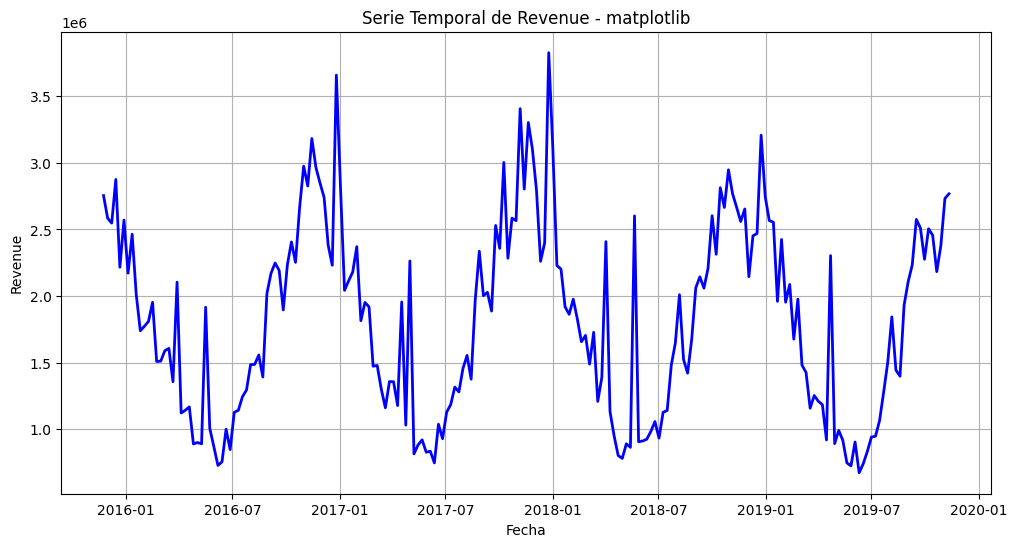

In [5]:
# Importando matplotlib
import matplotlib.pyplot as plt

# Creando un gráfico de línea para la serie temporal "revenue"
plt.figure(figsize=(12, 6))
plt.plot(df['revenue'], lw=2, color='blue')
plt.title('Serie Temporal de Revenue - matplotlib')
plt.xlabel('Fecha')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


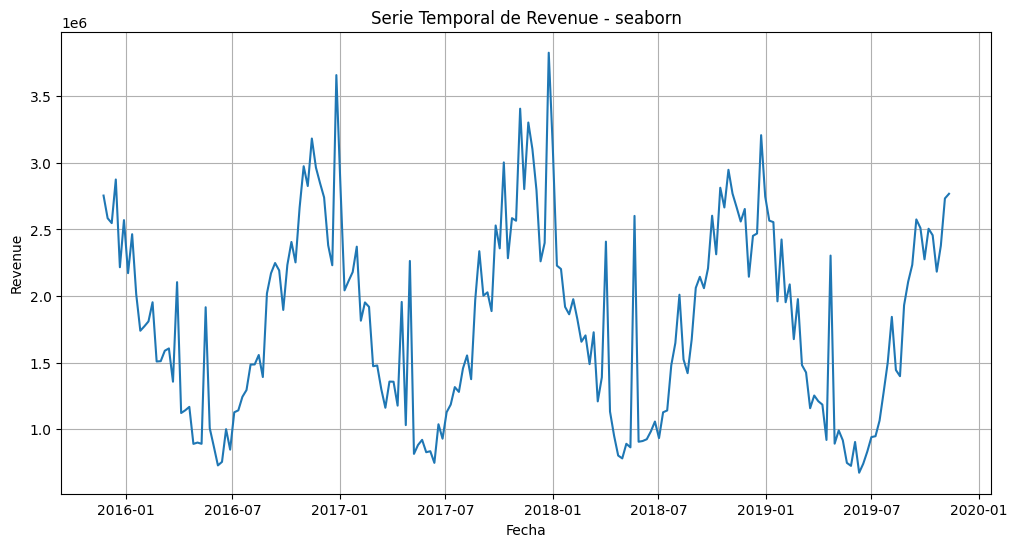

In [6]:
# Creando un gráfico de línea para la serie temporal "revenue" usando Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['revenue'])
plt.title('Serie Temporal de Revenue - seaborn')
plt.xlabel('Fecha')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


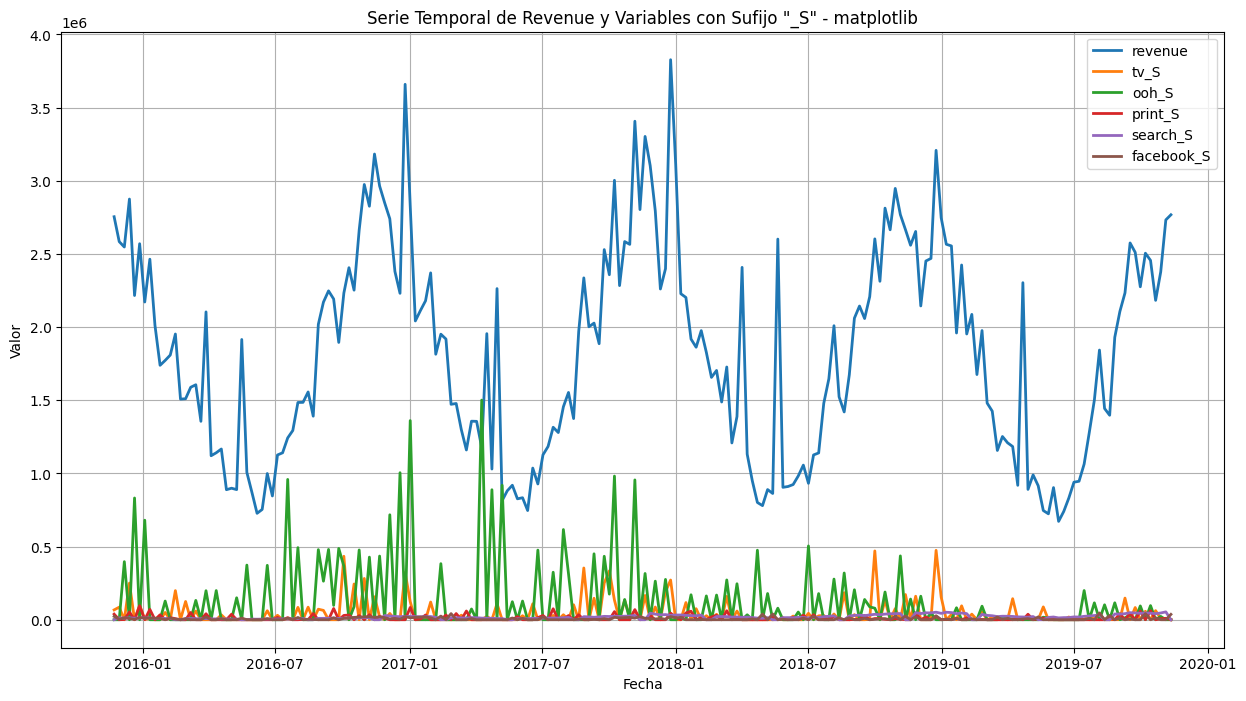

In [7]:
# Creando un gráfico de línea para la serie temporal "revenue" y todas las columnas que terminan con "_S"
plt.figure(figsize=(15, 8))

# Graficando la serie temporal "revenue"
plt.plot(df['revenue'], lw=2, label='revenue')

# Graficando las columnas que terminan con "_S"
for column in df.columns:
    if column.endswith('_S'):
        plt.plot(df[column], lw=2, label=column)

plt.title('Serie Temporal de Revenue y Variables con Sufijo "_S" - matplotlib')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


Podemos lograr el mismo resultado utilizando Seaborn, que nos ofrece una forma más concisa de crear este tipo de gráficos. Vamos a utilizar la función sns.lineplot junto con la función melt de Pandas para reorganizar el DataFrame de una manera que sea compatible con Seaborn.

In [8]:
# Creando un DataFrame que contenga solo las columnas que terminan con "_S" y "revenue"
columns_to_plot = [col for col in df.columns if col.endswith('_S') or col == 'revenue']
df_s_variables = df[columns_to_plot]

# "Derritiendo" el DataFrame para que sea compatible con Seaborn
df_melted = df_s_variables.reset_index().melt(id_vars='DATE', var_name='Variable', value_name='Valor')
df_melted.head()

,DATE,Variable,Valor
0,2015-11-23,revenue,2.754372e+06
1,2015-11-30,revenue,2.584277e+06
2,2015-12-07,revenue,2.547387e+06
3,2015-12-14,revenue,2.875220e+06
4,2015-12-21,revenue,2.215953e+06


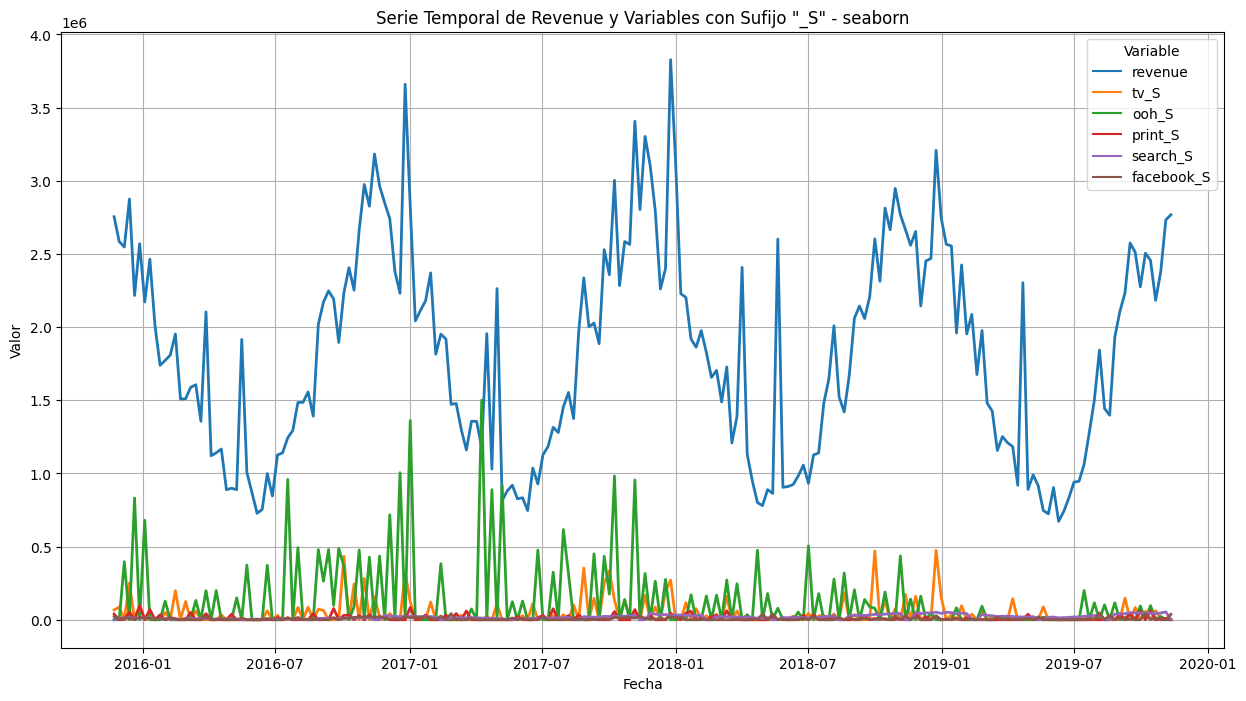

In [9]:

# Creando el gráfico de línea con Seaborn
plt.figure(figsize=(15, 8))
sns.lineplot(x='DATE', y='Valor', hue='Variable', data=df_melted, lw=2)
plt.title('Serie Temporal de Revenue y Variables con Sufijo "_S" - seaborn')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


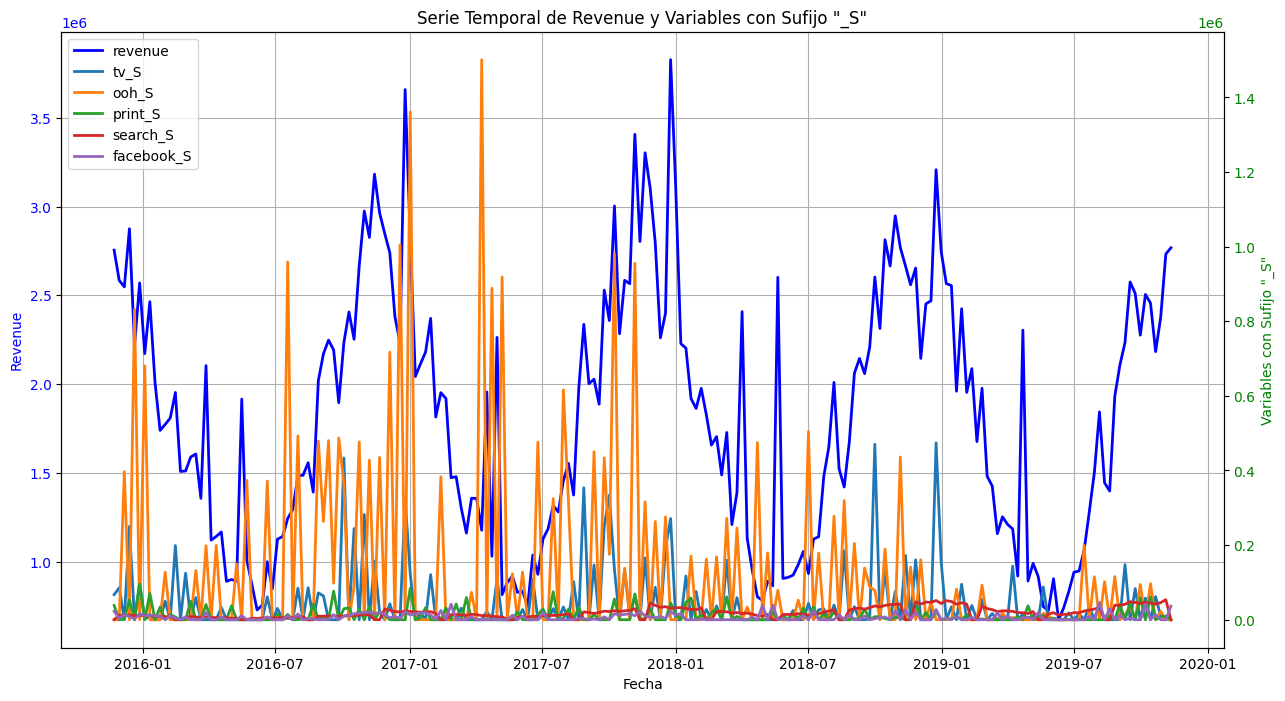

In [10]:
# Creando una figura y un eje
fig, ax1 = plt.subplots(figsize=(15, 8))

# Graficando la serie temporal "revenue" en el eje y principal
ax1.plot(df['revenue'], lw=2, color='blue', label='revenue')
ax1.set_title('Serie Temporal de Revenue y Variables con Sufijo "_S"')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Creando un eje y secundario
ax2 = ax1.twinx()

# Graficando las columnas que terminan con "_S" en el eje y secundario
for column in df.columns:
    if column.endswith('_S'):
        ax2.plot(df[column], lw=2, label=column)

ax2.set_ylabel('Variables con Sufijo "_S"', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadiendo una leyenda que combine ambas series
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


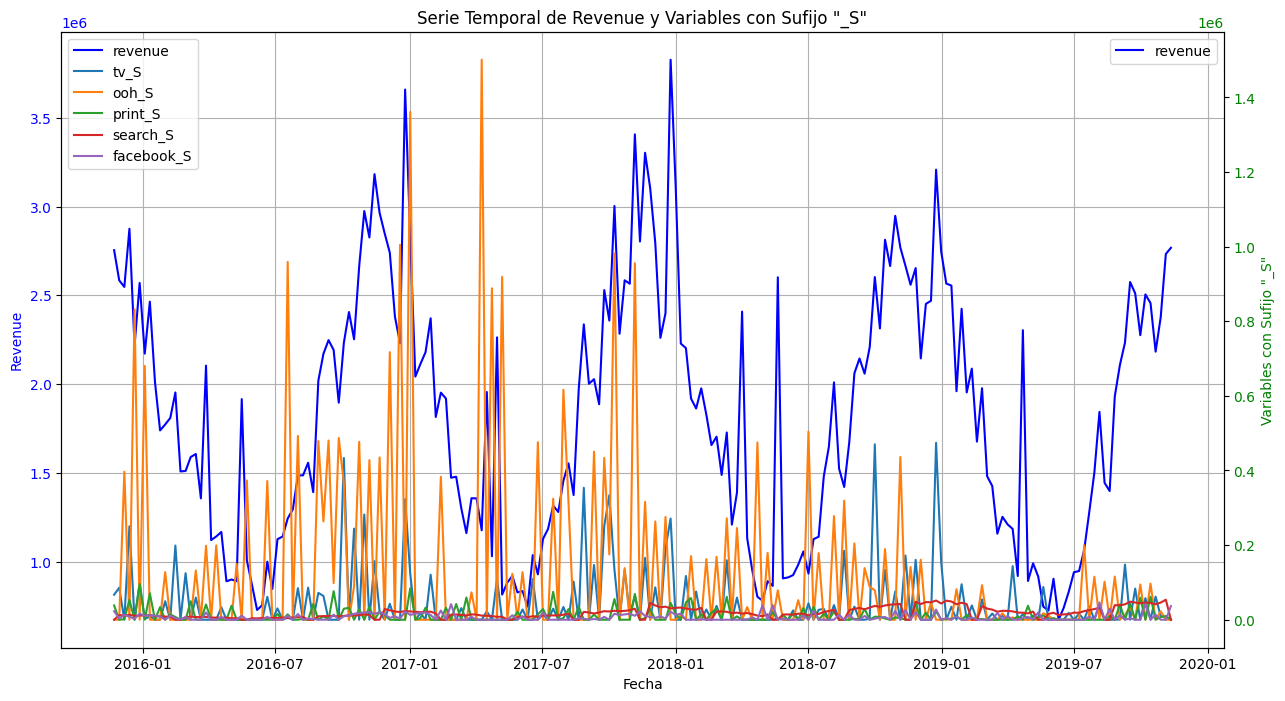

In [11]:
# Creando una figura y un eje
fig, ax1 = plt.subplots(figsize=(15, 8))

# Graficando la serie temporal "revenue" en el eje y principal usando Seaborn
sns.lineplot(x=df.index, y=df['revenue'], ax=ax1, color='blue', label='revenue')
ax1.set_title('Serie Temporal de Revenue y Variables con Sufijo "_S"')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Creando un eje y secundario
ax2 = ax1.twinx()

# Graficando las columnas que terminan con "_S" en el eje y secundario usando Seaborn
for column in df.columns:
    if column.endswith('_S'):
        sns.lineplot(x=df.index, y=df[column], ax=ax2, label=column)

ax2.set_ylabel('Variables con Sufijo "_S"', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadiendo una leyenda que combine ambas series
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [12]:
# Importando Plotly Express
import plotly.express as px
import plotly.graph_objects as go

# Creando una figura con Plotly
fig = go.Figure()

# Agregando la serie temporal "revenue" al gráfico
fig.add_trace(go.Scatter(x=df.index, y=df['revenue'], name='revenue', line=dict(color='blue')))

# Agregando las series que terminan con "_S" al gráfico en un eje y secundario
for column in df.columns:
    if column.endswith('_S'):
        fig.add_trace(go.Scatter(x=df.index, y=df[column], name=column, yaxis='y2'))

# Configurando el eje y secundario
fig.update_layout(
    yaxis2=dict(
        title='Variables con Sufijo "_S"',
        overlaying='y',
        side='right'
    ),
    title='Serie Temporal de Revenue y Variables con Sufijo "_S"',
    xaxis_title='Fecha',
    yaxis_title='Revenue',
    legend_title_text='Variables'
)

# Mostrando el gráfico
fig.show()


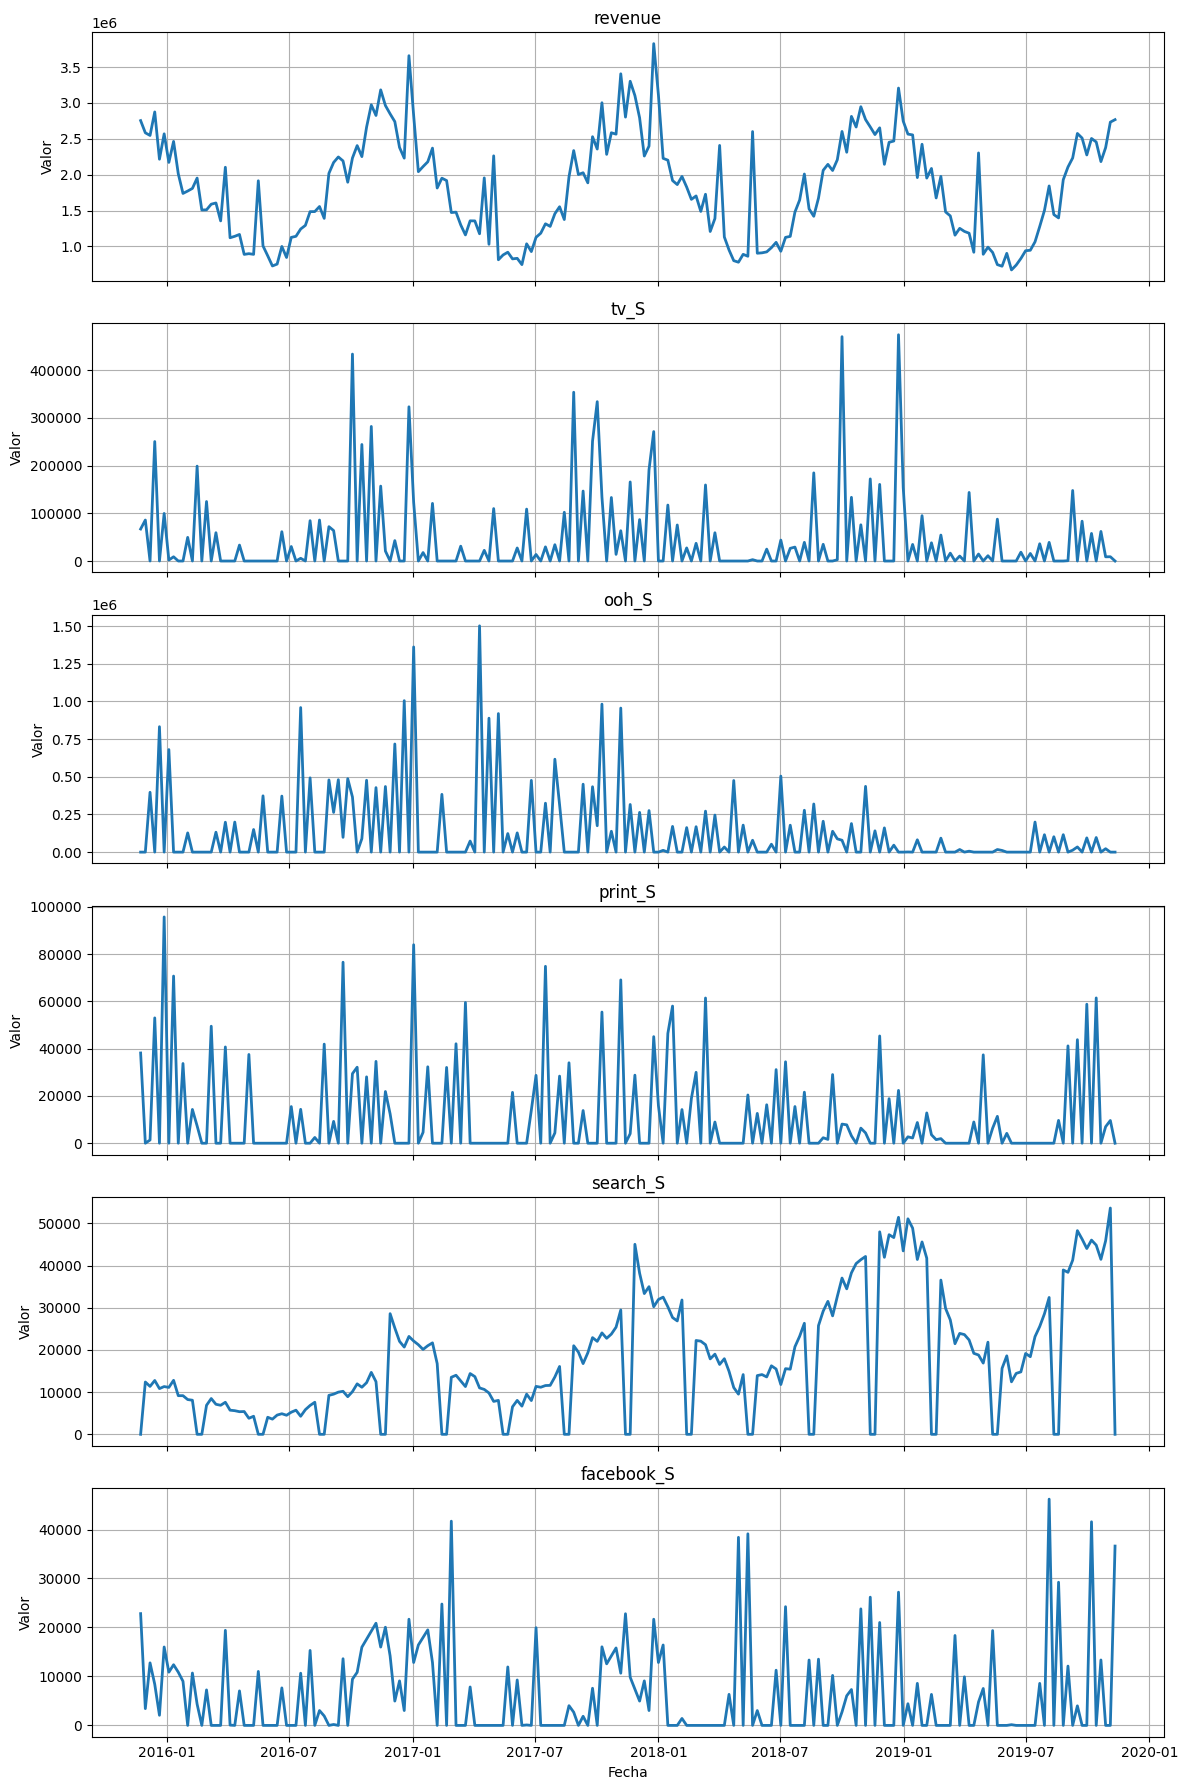

In [13]:
# Identificando las columnas que terminan con "_S" junto con "revenue"
columns_to_plot = ['revenue'] + [col for col in df.columns if col.endswith('_S')]

# Calculando el número de subgráficos
num_subplots = len(columns_to_plot)

# Creando una figura con múltiples subgráficos
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 3 * num_subplots), sharex=True)

# Graficando cada serie en su propio subplot
for ax, column in zip(axes, columns_to_plot):
    ax.plot(df[column], lw=2, label=column)
    ax.set_title(column)
    ax.set_ylabel('Valor')
    ax.grid(True)

# Configurando el eje x común
axes[-1].set_xlabel('Fecha')

# Ajustando el espacio entre los subgráficos
plt.tight_layout()

# Mostrando la figura
plt.show()


Seaborn también facilita la creación de múltiples subgráficos, especialmente cuando se quiere comparar varias series a lo largo de una dimensión común, como el tiempo en este caso.

Podemos utilizar la función relplot de Seaborn con el parámetro kind='line' para crear un gráfico de líneas en varios subgráficos. Primero, necesitamos "derretir" el DataFrame para que sea compatible con Seaborn, y luego podemos trazar las series.

c:\Users\mcondedesimon\OneDrive - Deloitte (O365D)\Documents\PLAYGROUND\explo_py\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\mcondedesimon\AppData\Local\Temp\ipykernel_101804\1347434933.py:12: UserWarning:

The figure layout has changed to tight



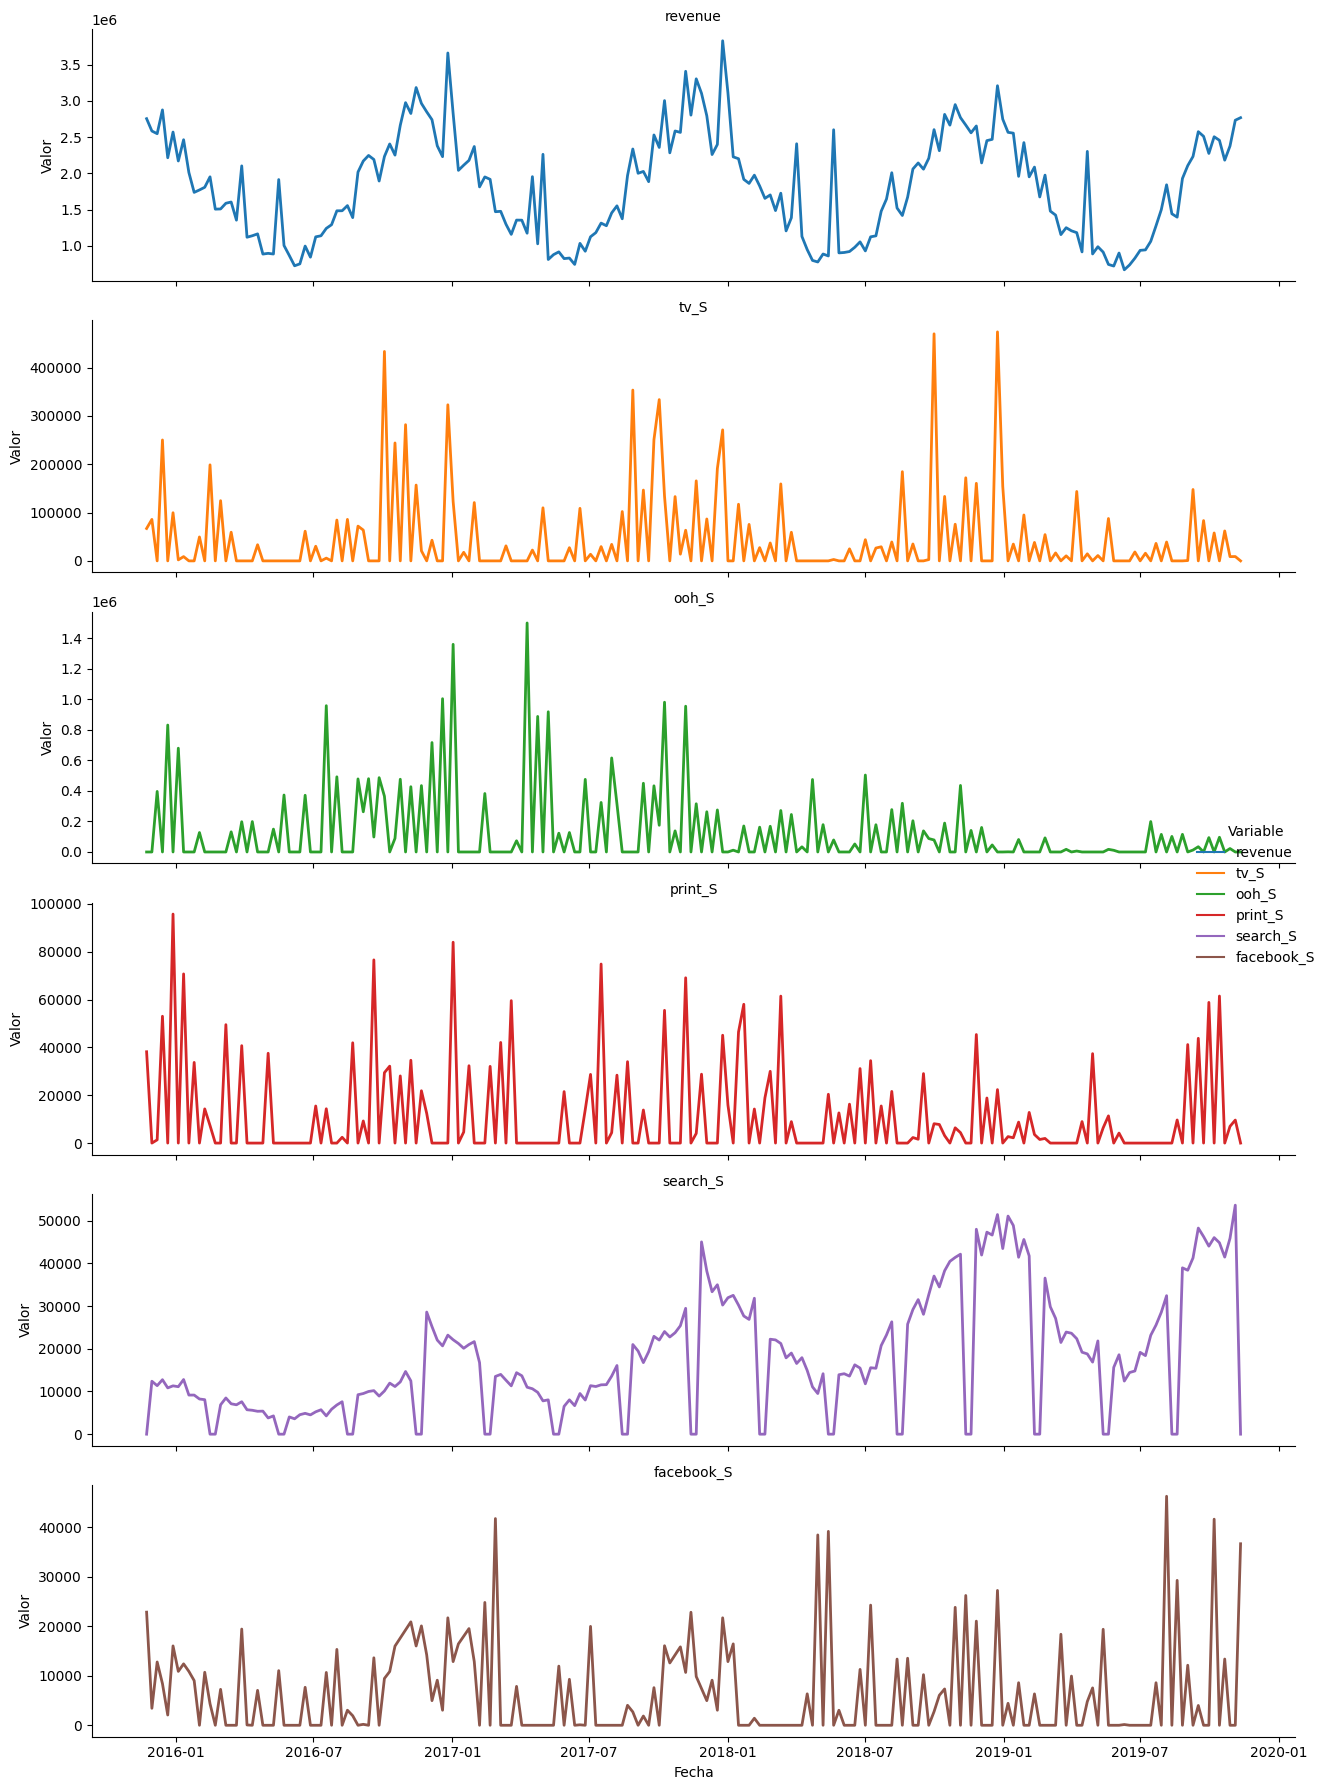

In [14]:
# "Derritiendo" el DataFrame para incluir solo las columnas que queremos trazar
df_melted_subplots = df[columns_to_plot].reset_index().melt(id_vars='DATE', var_name='Variable', value_name='Valor')

# Creando un gráfico de líneas con subgráficos usando Seaborn
g = sns.relplot(x='DATE', y='Valor', hue='Variable', col='Variable', col_wrap=1,
                kind='line', data=df_melted_subplots, facet_kws={'sharey': False, 'sharex': True},
                height=3, aspect=4, lw=2)

# Ajustando títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels('Fecha', 'Valor')
plt.tight_layout()
plt.show()
